### Project: Application of Clustering Model

#### Dataset Link

https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

In [2]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.cluster.vq import kmeans,vq
from numpy import vstack,array

import sklearn
 
from sklearn.cluster import KMeans
%matplotlib inline

df_stock = pd.read_csv('/gdrive/My Drive/Colab Notebooks/data_stocks.csv')
df_stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df_stock.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,12.624442,167.030297,968.747188,57.683091,238.598238,33.413552,272.957640,32.652696,89.325485,126.928020,64.227338,69.502897,348.719389,73.025271,39.607469,121.375413,165.457076,32.139336,51.284218,127.416660,65.928564,81.014205,26.051030,25.216388,62.413344,75.477313,107.713287,34.794506,432.201844,...,18.236453,19.777207,73.184257,38.363101,116.967866,181.850786,47.086121,107.603907,109.019095,113.124563,51.863284,119.265065,95.693963,98.311314,57.134291,65.903890,123.767195,89.828376,66.790525,46.574448,176.242257,62.352736,53.587272,181.971118,73.777928,30.102558,77.066819,55.411353,19.272765,33.248472,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,1.172758,6.910730,38.966684,4.567420,12.824877,3.975551,13.763994,1.178095,5.746178,6.840787,2.634135,3.436516,25.257095,3.230921,1.225993,3.833343,10.024798,0.985571,2.377096,4.927756,4.133884,3.225397,1.976801,2.176216,2.624382,4.669540,9.865916,1.099296,17.370211,...,1.380061,1.437846,5.561782,1.159465,5.836284,9.608218,1.656671,2.717122,3.275806,5.662877,0.760720,3.242153,4.385522,5.335147,3.563356,1.859369,5.155408,9.226681,2.005502,1.767864,8.983449,1.540708,1.289050,9.512629,1.464602,0.927709,2.524082,2.424774,0.362162,0.908009,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,9.871000,152.300000,884.670000,48.410000,208.560000,28.020000,244.280000,30.460000,80.000000,113.771600,58.210000,63.510000,312.660000,68.500000,37.025000,114.840000,150.000000,30.365000,46.101500,119.540000,57.530000,74.110000,22.110000,20.825000,56.090000,66.020000,87.940000,31.890000,396.940000,...,15.090000,16.125000,61.335000,35.460000,105.010000,164.390000,43.550000,101.080000,102.140000,100.735000,49.560000,111.290000,88.1

#### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f952fff2c18>,
      dtype=object)

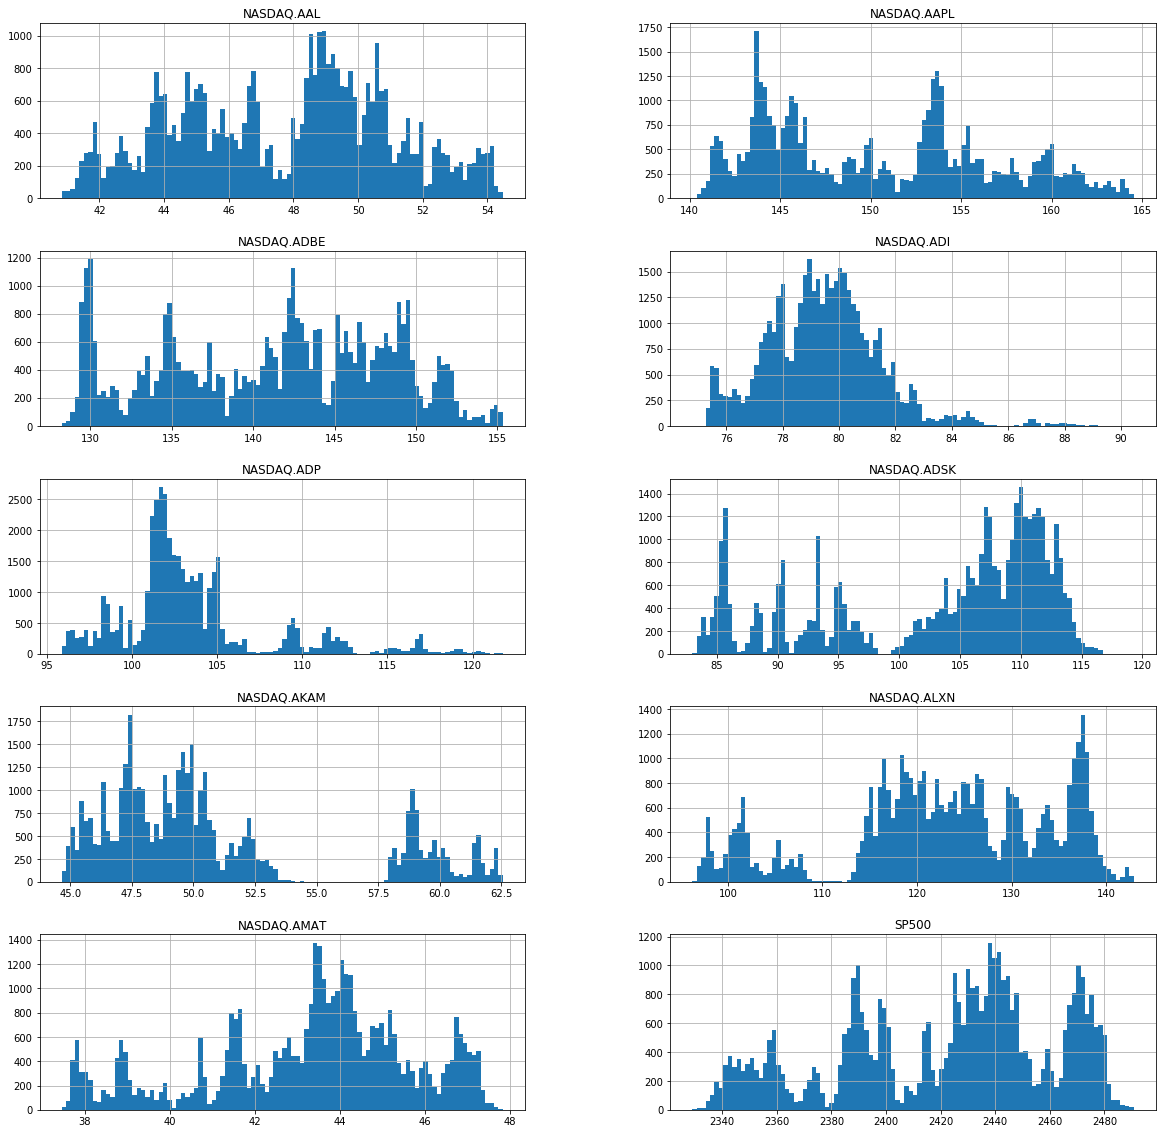

In [5]:
df_stock.iloc[:,1:11].hist(bins=100, figsize=(20,20), layout=(5,2))

In [6]:
import datetime as dt
date_df = pd.DataFrame()
date_df['date'] = df_stock.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
date_df['time'] = df_stock.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%X'))
date_df.head()

,date,time
0,2017-04-03,13:30:00
1,2017-04-03,13:31:00
2,2017-04-03,13:32:00
3,2017-04-03,13:33:00
4,2017-04-03,13:34:00


In [7]:
date_df.groupby(by='date').count().shape 

(106, 1)

In [0]:
stock_prices = df_stock.drop('DATE', axis =1)

Text(0.5, 1.0, 'Elbow curve')

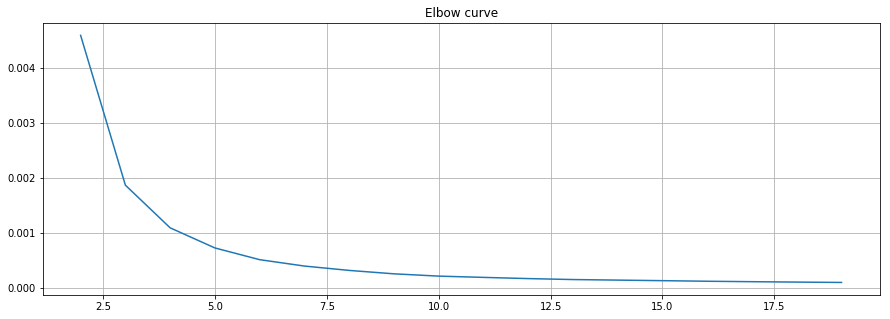

In [9]:
# Calculate average annual percentage return and volatilities over the time period of the data in the dataset
performance = stock_prices.pct_change().mean() * 128
performance = pd.DataFrame(performance)
performance.columns = ['Performance']
performance['Volatility'] = stock_prices.pct_change().std() * sqrt(128)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

X = data
wc_sse = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wc_sse.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wc_sse)
plt.grid(True)
plt.title('Elbow curve')

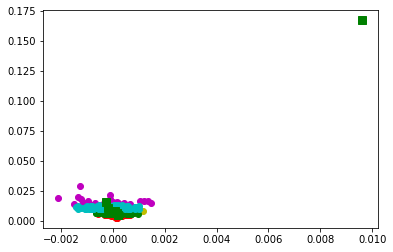

In [10]:
# computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

In [11]:
#identify the outlier
print(performance.idxmax())

Performance    NYSE.XRX
Volatility     NYSE.XRX
dtype: object


In [0]:
#drop the relevant stock from our data
performance.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(performance['Performance']),np.asarray(performance['Volatility'])]).T

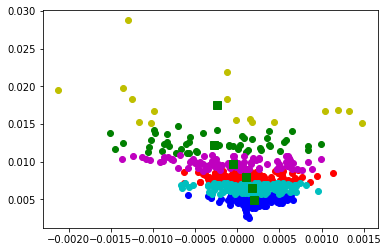

In [13]:
# computing K-Means with K = 6(6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'oc')

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)

#### Problem 1:

**There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance**

In [14]:
similar_performance = [(name,cluster) for name, cluster in zip(performance.index.values,idx)]
similar_performance

[('SP500', 0),
 ('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 5),
 ('NASDAQ.ADBE', 5),
 ('NASDAQ.ADI', 4),
 ('NASDAQ.ADP', 2),
 ('NASDAQ.ADSK', 3),
 ('NASDAQ.AKAM', 3),
 ('NASDAQ.ALXN', 3),
 ('NASDAQ.AMAT', 4),
 ('NASDAQ.AMD', 1),
 ('NASDAQ.AMGN', 5),
 ('NASDAQ.AMZN', 2),
 ('NASDAQ.ATVI', 4),
 ('NASDAQ.AVGO', 4),
 ('NASDAQ.BBBY', 4),
 ('NASDAQ.BIIB', 2),
 ('NASDAQ.CA', 4),
 ('NASDAQ.CBOE', 5),
 ('NASDAQ.CELG', 5),
 ('NASDAQ.CERN', 5),
 ('NASDAQ.CHRW', 2),
 ('NASDAQ.CHTR', 4),
 ('NASDAQ.CINF', 5),
 ('NASDAQ.CMCSA', 5),
 ('NASDAQ.CME', 5),
 ('NASDAQ.COST', 2),
 ('NASDAQ.CSCO', 2),
 ('NASDAQ.CSX', 2),
 ('NASDAQ.CTAS', 5),
 ('NASDAQ.CTSH', 0),
 ('NASDAQ.CTXS', 2),
 ('NASDAQ.DISCA', 4),
 ('NASDAQ.DISCK', 4),
 ('NASDAQ.DISH', 4),
 ('NASDAQ.DLTR', 3),
 ('NASDAQ.EA', 4),
 ('NASDAQ.EBAY', 2),
 ('NASDAQ.EQIX', 2),
 ('NASDAQ.ESRX', 4),
 ('NASDAQ.ETFC', 2),
 ('NASDAQ.EXPD', 5),
 ('NASDAQ.EXPE', 2),
 ('NASDAQ.FAST', 4),
 ('NASDAQ.FB', 5),
 ('NASDAQ.FFIV', 4),
 ('NASDAQ.FISV', 0),
 ('NASDAQ.FITB', 4),
 ('NASD

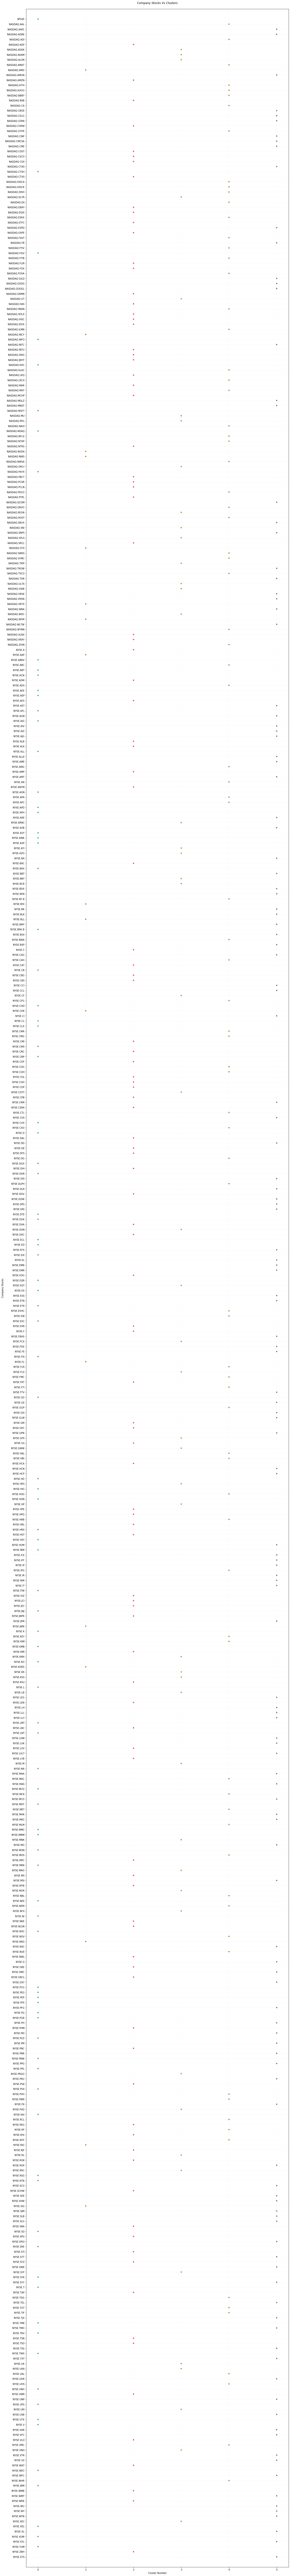

In [15]:
plt.figure(figsize = (20,200))
plt.title('Company Stocks Vs Clusters\n')
plt.ylim(-2,len(performance.index.values)+1)
plt.xlabel('Cluster Number')
plt.ylabel('Company Stocks')
plt.gca().invert_yaxis()
plt.grid(axis='both', alpha= 0.1)

sns.scatterplot(x=idx, y= performance.index.values, hue = idx,palette= 'Dark2', legend= False)

#### Problem 2:

**How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.**

From the above chart, we can observe that there exist 6 unique patterns  in the historical stock data set.

#### Problem 3:

**Identify which all stocks are moving together and which all stocks are different from each other.**

In [16]:
moving_together = [(name,cluster) for name, cluster in zip(performance.index.values,idx)]
moving_together

[('SP500', 0),
 ('NASDAQ.AAL', 4),
 ('NASDAQ.AAPL', 5),
 ('NASDAQ.ADBE', 5),
 ('NASDAQ.ADI', 4),
 ('NASDAQ.ADP', 2),
 ('NASDAQ.ADSK', 3),
 ('NASDAQ.AKAM', 3),
 ('NASDAQ.ALXN', 3),
 ('NASDAQ.AMAT', 4),
 ('NASDAQ.AMD', 1),
 ('NASDAQ.AMGN', 5),
 ('NASDAQ.AMZN', 2),
 ('NASDAQ.ATVI', 4),
 ('NASDAQ.AVGO', 4),
 ('NASDAQ.BBBY', 4),
 ('NASDAQ.BIIB', 2),
 ('NASDAQ.CA', 4),
 ('NASDAQ.CBOE', 5),
 ('NASDAQ.CELG', 5),
 ('NASDAQ.CERN', 5),
 ('NASDAQ.CHRW', 2),
 ('NASDAQ.CHTR', 4),
 ('NASDAQ.CINF', 5),
 ('NASDAQ.CMCSA', 5),
 ('NASDAQ.CME', 5),
 ('NASDAQ.COST', 2),
 ('NASDAQ.CSCO', 2),
 ('NASDAQ.CSX', 2),
 ('NASDAQ.CTAS', 5),
 ('NASDAQ.CTSH', 0),
 ('NASDAQ.CTXS', 2),
 ('NASDAQ.DISCA', 4),
 ('NASDAQ.DISCK', 4),
 ('NASDAQ.DISH', 4),
 ('NASDAQ.DLTR', 3),
 ('NASDAQ.EA', 4),
 ('NASDAQ.EBAY', 2),
 ('NASDAQ.EQIX', 2),
 ('NASDAQ.ESRX', 4),
 ('NASDAQ.ETFC', 2),
 ('NASDAQ.EXPD', 5),
 ('NASDAQ.EXPE', 2),
 ('NASDAQ.FAST', 4),
 ('NASDAQ.FB', 5),
 ('NASDAQ.FFIV', 4),
 ('NASDAQ.FISV', 0),
 ('NASDAQ.FITB', 4),
 ('NASD